In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_result = pd.read_csv("/home/rifaioglu/projects/GNNClinicalOutcomePrediction/data/out_data/baseline_predictors/pseudobulk_results.csv", index_col=0)

In [16]:
est_agg_dict = dict()
for col in df_result.columns:
    est, ind, agg = col.split("-")
    # print(est, ind, agg )
    est_agg = f"{est}-{agg}"
    if not est_agg in est_agg_dict.keys():
        est_agg_dict[est_agg] =  df_result[col]
    else:
        if df_result[col].mean() > est_agg_dict[est_agg].mean():
            est_agg_dict[est_agg] = df_result[col]

In [21]:
import numpy as np
best_results = []
best_cols = []
for key in est_agg_dict.keys():
    best_cols.append(key)
    best_results.append(list(est_agg_dict[key].values))

df_best_results = pd.DataFrame(np.array(best_results).T, columns=best_cols) 

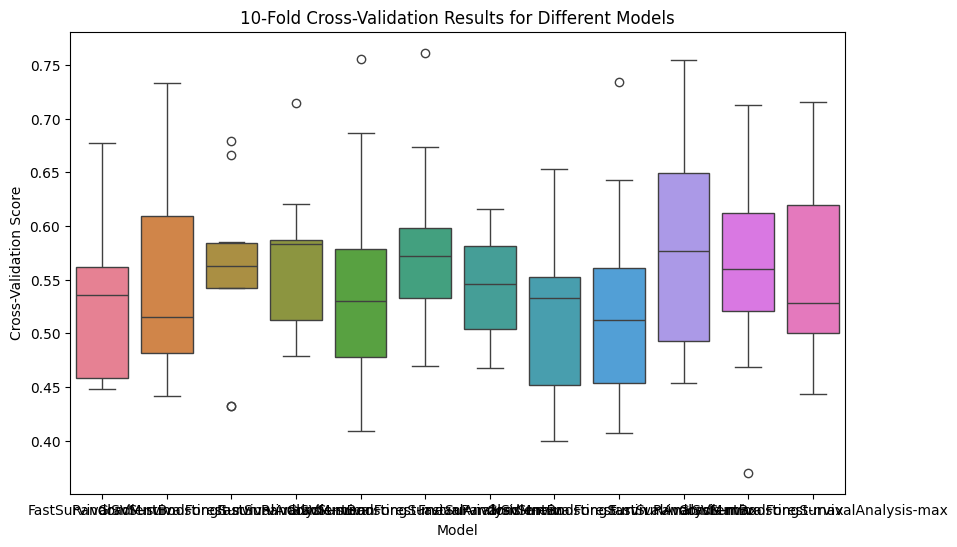

In [24]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_best_results)

# Add title and labels
plt.title('10-Fold Cross-Validation Results for Different Models')
plt.xlabel('Model')
plt.ylabel('Cross-Validation Score')

# Display the plot
plt.show()

In [ ]:
mean_values = df_result.agg(func="mean", axis=0)  # Compute the mean along axis 0
# index_of_max = mean_values.idxmax()               # Get the index of the maximum mean value
# index_of_max

In [ ]:
index_of_max